In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#Hello this is my commit

In [82]:
load_position = [-52, -228, -392, -568, -732, -908]
P = [-91, -91, -67.5, -67.5, -67.5, -67.5]
max_length = 1250
reaction_locations = (25, 1225)

In [83]:
def get_loads(total_load):
    normal_load = total_load/6.7
    heavy_load = normal_load*1.35
    P = [heavy_load, heavy_load, normal_load, normal_load, normal_load, normal_load]
    return P

# Takes in x (the position of the front of the car), P (an array that represents the magnitude of the loads)
# P_locations (the position of the loads relative to the front of the car), max_length (the length of the bridge)
# Returns a dictionary with (position of load):(magnitude of load)
def find_loads(x, P, P_locations, max_length):
    loads = {}
    for i in range(len(P)):
        P_location = x + P_locations[i]
        if P_location >= 0 and P_location <= max_length:  
            loads[P_location] = P[i]
    return loads

def find_reaction(loads, reaction_locations):
    left_reaction_loc, right_reaction_loc = reaction_locations
    left_reaction_mag, right_reaction_mag = 0,0
    moment = 0
    force = 0
    for load in loads:
        moment += loads[load] * (load - left_reaction_loc)
        force += loads[load]
    right_reaction_mag = -1 * moment / (right_reaction_loc - left_reaction_loc)
    left_reaction_mag = -(force + right_reaction_mag)
    reactions = {left_reaction_loc: left_reaction_mag, right_reaction_loc: right_reaction_mag}
    return reactions

def find_shear(shear_forces, max_length):
    current_shear = 0
    shear = {}
    for i in range(max_length):
        shear[i] = current_shear
        if i in shear_forces:
            current_shear += shear_forces[i]
    return shear
    
def find_moment(shear_forces, max_length):
    current_shear = 0
    current_moment = 0
    moments = {}
    for i in range(max_length):
        current_moment += current_shear
        moments[i] = current_moment
        if i in shear_forces:
            current_shear += shear_forces[i]
    return moments

def calculate_at_train_position(func, x, total_load, load_position, reaction_locations, max_length):
    load_mag = get_loads(total_load)
    loads = find_loads(x, load_mag, load_position, max_length)
    reactions = find_reaction(loads, reaction_locations)
    shear = {k: loads.get(k, 0) + reactions.get(k, 0) for k in set(loads) | set(reactions)}
    print(loads)
    data = func(shear, max_length)
    return data
    

def envelope(func, total_load, load_position, reaction_locations, max_length):
    load_mag = get_loads(total_load)
    maximum = {}
    x_at_max = {}
    minimum = {}
    x_at_min = {}
    for x in range(max_length):
        loads = find_loads(x, load_mag, load_position, max_length)
        reactions = find_reaction(loads, reaction_locations)
        shear = {k: loads.get(k, 0) + reactions.get(k, 0) for k in set(loads) | set(reactions)}
        data_at_pos = func(shear, max_length)
        for pos in data_at_pos:
            if pos not in maximum:
                maximum[pos] = data_at_pos[pos]
                x_at_max[pos] = x
                minimum[pos] = data_at_pos[pos]
                x_at_min[pos] = x
            elif maximum[pos] < data_at_pos[pos]:
               maximum[pos] = data_at_pos[pos]
               x_at_max[pos] = x 
            elif minimum[pos] > data_at_pos[pos]:
                minimum[pos] = data_at_pos[pos]
                x_at_min[pos] = x
    return maximum, x_at_max, minimum, x_at_min

def plot_all_load_cases(func, total_load, load_position, reaction_locations, max_length, xlabel, ylabel, filename):
    data = []
    load_mag = get_loads(total_load)
    for x in range(max_length):
        loads = find_loads(x, load_mag, load_position, max_length)
        reactions = find_reaction(loads, reaction_locations)
        shear = {k: loads.get(k, 0) + reactions.get(k, 0) for k in set(loads) | set(reactions)}
        data_at_pos = func(shear, max_length)
        for pos in data_at_pos:
            data.append([pos, data_at_pos[pos]])

    # Plotting
    plot_x = []
    plot_y = []
    for i in data:
        plot_x.append(i[0])
        plot_y.append(i[1])

    plt.scatter(plot_x, plot_y, color='black', s=3, alpha=0.8)
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.savefig(filename)
    plt.show()


def plot(data, xlabel, ylabel, filename):
    # Extract x and y values
    x = list(data.keys())
    y = list(data.values())

    # Create scatterplot
    plt.scatter(x, y, color='black', s=3, alpha=0.8)

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.savefig(filename)
    plt.show()


def plot_envelope(envelope_max, envelope_min, xlabel, ylabel, filename):
    # Extract x and y values
    x_max = list(envelope_max.keys())
    y_max = list(envelope_max.values())
    x_min = list(envelope_min.keys())
    y_min = list(envelope_min.values())

    # Create scatterplot
    plt.scatter(x_max, y_max, color='black', s=3, alpha=0.8)
    plt.scatter(x_min, y_min, color='black', s=3, alpha=0.8)


    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.savefig(filename)
    plt.show()
    
    

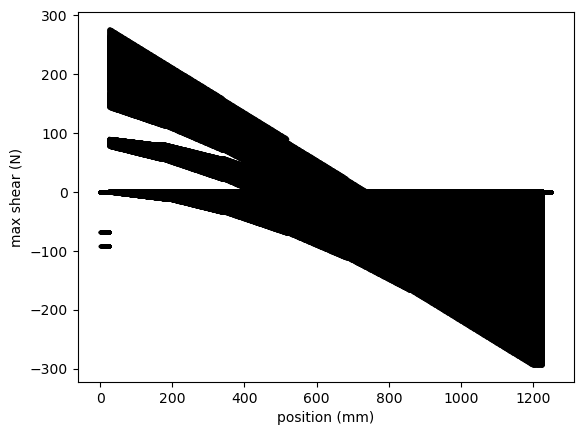

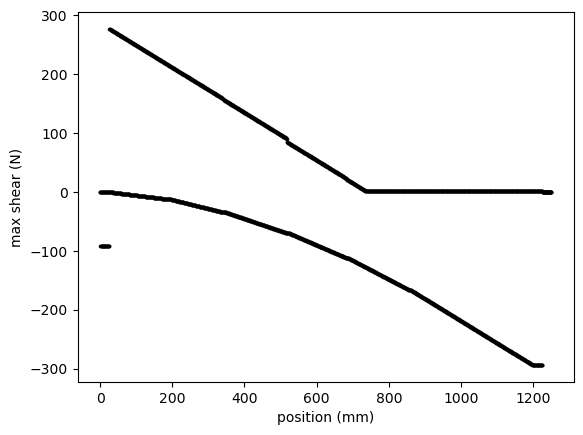

52


In [90]:
loads_mag = get_loads(-452)
loads = find_loads(1105, loads_mag, load_position, max_length)
reactions = find_reaction(loads,reaction_locations)
shear = {k: loads.get(k, 0) + reactions.get(k, 0) for k in set(loads) | set(reactions)}
shears = find_shear(shear, max_length)
moments = find_moment(shear, max_length)
plot_all_load_cases(find_shear, -452, load_position, reaction_locations, max_length, "position (mm)", "max shear (N)", "test.png")
envelope_shear = envelope(find_shear, -452, load_position, reaction_locations, max_length)
plot_envelope(envelope_shear[0],envelope_shear[2],  "position (mm)", "max shear (N)", "shear.png")
print(envelope_shear[1][1200])